In [17]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [18]:
#导入数据并显示
data = pd.read_csv('fruit_data.csv') #导入数据
data #显示数据

,fruit_name,mass,width,height,color_score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79
5,mandarin,80,5.8,4.3,0.77
6,mandarin,80,5.9,4.3,0.81
7,mandarin,76,5.8,4.0,0.81
8,apple,178,7.1,7.8,0.92
9,apple,172,7.4,7.0,0.89


In [19]:
#使用LabelEncoder，将fruit_name进行编码
labelencoder = LabelEncoder() #定义labelencoder
data.iloc[:,0] = labelencoder.fit_transform(data.iloc[:,0]) #调用fit_transform方法，将fruit_name从字符编码为数字
data #显示编码后的数据

,fruit_name,mass,width,height,color_score
0,0,192,8.4,7.3,0.55
1,0,180,8.0,6.8,0.59
2,0,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79
5,2,80,5.8,4.3,0.77
6,2,80,5.9,4.3,0.81
7,2,76,5.8,4.0,0.81
8,0,178,7.1,7.8,0.92
9,0,172,7.4,7.0,0.89


In [20]:
#显示编号对应的fruit_name
labelencoder.classes_

array(['apple', 'lemon', 'mandarin', 'orange'], dtype=object)

In [21]:
# 切分数据集，
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.3, stratify=data.iloc[:,0], random_state=20)

In [22]:
#设置不同的k值，得到测试结果

# 保存不同k值测试集准确率
test_scores = []
# 保存不同k值训练集准确率
train_scores = []

# 设置30个k值
k = 30
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    # 保存测试集准确率
    test_scores.append(knn.score(x_test,y_test))
    # 保存训练集准确率
    train_scores.append(knn.score(x_train,y_train))

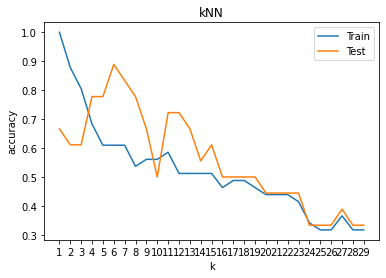

In [23]:
#显示不同的k值得到的训练集和测试集的准确率
plt.title('kNN')
plt.plot(range(1,k),train_scores,label="Train")
plt.plot(range(1,k),test_scores,label="Test")
plt.legend()
plt.xticks(range(1,k))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [39]:
# 选择一个最好的k值作为模型参数
# 建立预测模型
k = np.argmax(test_scores)+1
knn = KNeighborsClassifier(k)
knn.fit(x_train,y_train)
print(k) #打印k值
print(knn.score(x_test,y_test)) #打印预测的准确率

6
0.8888888888888888


In [40]:
#交叉验证

#保存不同k值准确率
cross_scores = []

# 设置30个k值
k = 30
for i in range(1,k):
    knn = KNeighborsClassifier(n_neighbors=i)
    # 执行4折交叉验证
    cross_score = cross_val_score(knn,x_train,y_train,cv=4).mean()
    # 保存准确率
    cross_scores.append(cross_score)

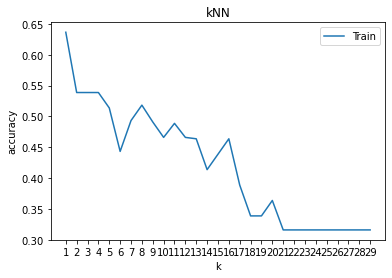

In [41]:
#显示不同的k值得到的训练集和测试集的准确率
plt.title('kNN')
plt.plot(range(1,k),cross_scores,label="Train")
plt.legend()
plt.xticks(range(1,k))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [42]:
# 选择一个最好的k值作为模型参数
# 建立预测模型
k = np.argmax(cross_scores)+1
knn = KNeighborsClassifier(k)
knn.fit(x_train,y_train)
print(k) #打印k值
print(knn.score(x_test,y_test)) #打印预测的准确率

1
0.6666666666666666
